In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import ClassBalance, ROCAUC, ClassificationReport, ClassPredictionError
%matplotlib inline
import warnings;warnings.simplefilter("ignore") # To ignore warnings

Each record in the dataset is an example of a hand consisting of 5 playing cards drawn from a standard playing deck of 52. Each card is described using 2 attributes (suit and rank), for a total of 10 predictive attributes. The target column describes the hand, with the possibilities being: 
0. Nothing in hand; not a recognised poker hand
1. One pair; one pair of equal ranks within 5 cards
2. Two pairs; two pairs of equal ranks within 5 cards
3. Three of a kind; 3 equal ranks within 5 cards
4. Straight; 5 cards, sequentially ranked with no gaps
5. Flush; 5 cards with the same suit
6. Full House; pair + different rank three of a kind
7. Four of a kind; 4 equal ranks within 5 cards
8. Straight Flush; Straight + Flush
9. Royal Flush; {Ace, King, Queen, Jack, Ten} + Flush

The order of the cards is important, which is why there are 480 possible Royal Flush hands as compared to 4 (1 for each suit).

In [2]:
poker_df = pd.read_csv("poker-hand-testing.data")

In [3]:
# Separate the data into features and targets: 
poker_df.head()

,1,1.1,1.2,13,2,4,2.1,3,1.3,12,0
0,3,12,3,2,3,11,4,5,2,5,1
1,1,9,4,6,1,4,3,2,3,9,1
2,1,4,3,13,2,13,2,1,3,6,1
3,3,10,2,7,1,2,2,11,4,9,0
4,1,3,4,5,3,4,1,12,4,6,0


In [4]:
# Manually label the columns and classes based on the dataset description 
poker_df.columns = ['first_suit', 'first_rank', 'second_suit', 'second_rank', 'third_suit', 'third_rank', 'fourth_suit', 'fourth_rank', 'fifth_suit', 'fifth_rank', 'hand']

labels = ['zilch', 'one_pair', 'two_pair', 'three_of_a_kind', 'straight', 'flush', 'full_house', 'four_of_a_kind', 'straight_flush', 'royal_flush']

# Separate the data into features (X) and targets (Y)
X = poker_df.iloc[:,0:9]
Y = poker_df.hand

# Evaluate Class Imbalance Problem

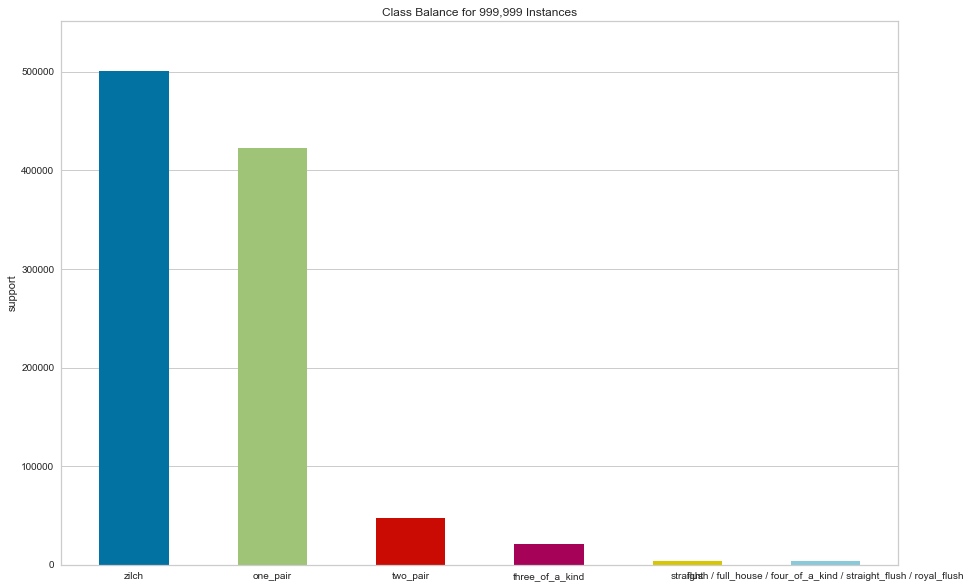

In [13]:
balance = ClassBalance(size = (1080, 720), labels = labels)

balance.fit(Y)
balance.poof()

# Unsampling from minority Classes


In [6]:
# Combine all columns after flush since they have low representation
poker_df.loc[poker_df["hand"] >= 5, 'hand'] = 5
Y = poker_df.hand

labels = ['zilch', 'one_pair', 'two_pair', 'three_of_a_kind', 'straight', 'flush / full_house / four_of_a_kind / straight_flush / royal_flush']


# Training the Random Forest Classifier 

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

clf = RandomForestClassifier(n_estimators = 100, 
                            class_weight = 'balanced',
                            n_jobs = -1)

clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

# Classification Accuracy 

In [8]:
Y_pred = clf.predict(X_test)

print("Accuracy: ", accuracy_score(Y_test, Y_pred))

Accuracy:  0.6759533333333333


# ROC (Reciever Operating Character) Curve and AUC (Area under the curve)

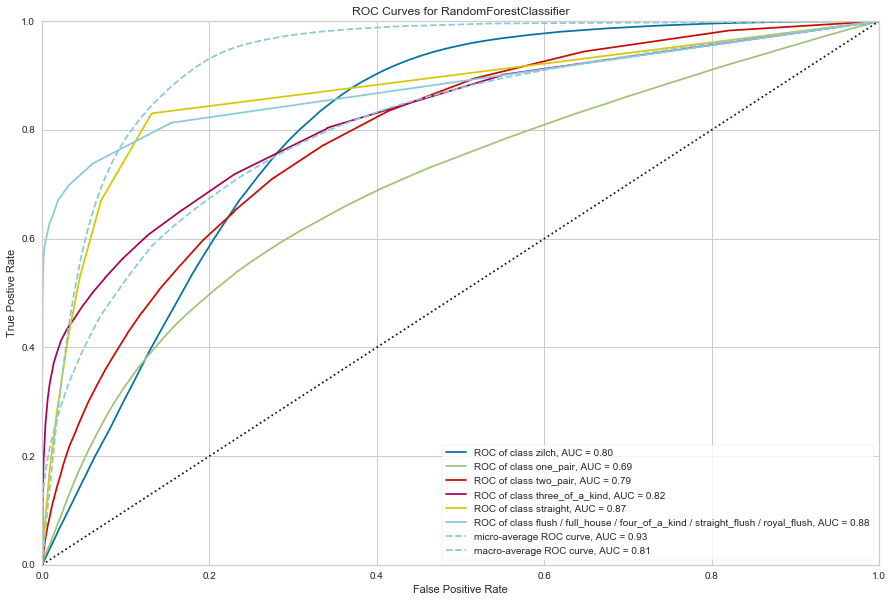

In [9]:
rocauc = ROCAUC(clf, size = (1080, 720), classes = labels)

rocauc.score(X_test, Y_test)
rocauc.poof()

# Classification Report Heatmap

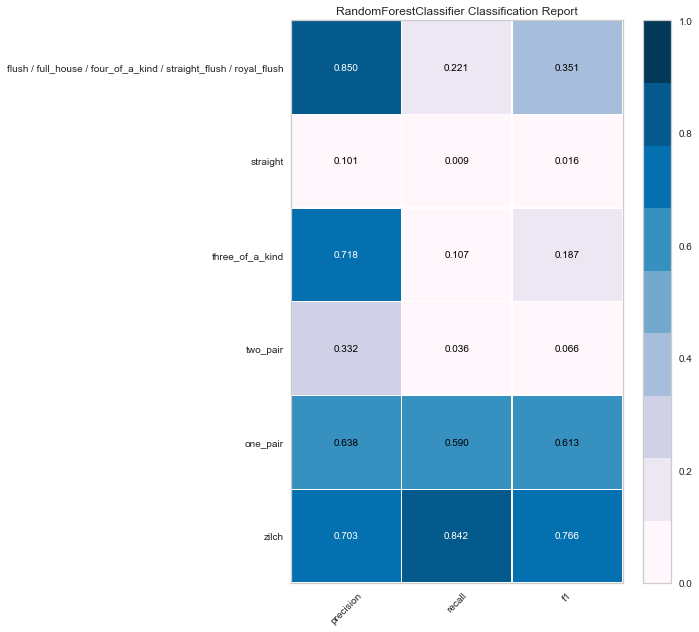

In [10]:
report = ClassificationReport(clf, size = (720, 640), classes = labels, cmap = 'PuBu')
report.score(X_test, Y_test)

report.show() # Can also use report.poof()

# Class Prediction Error  

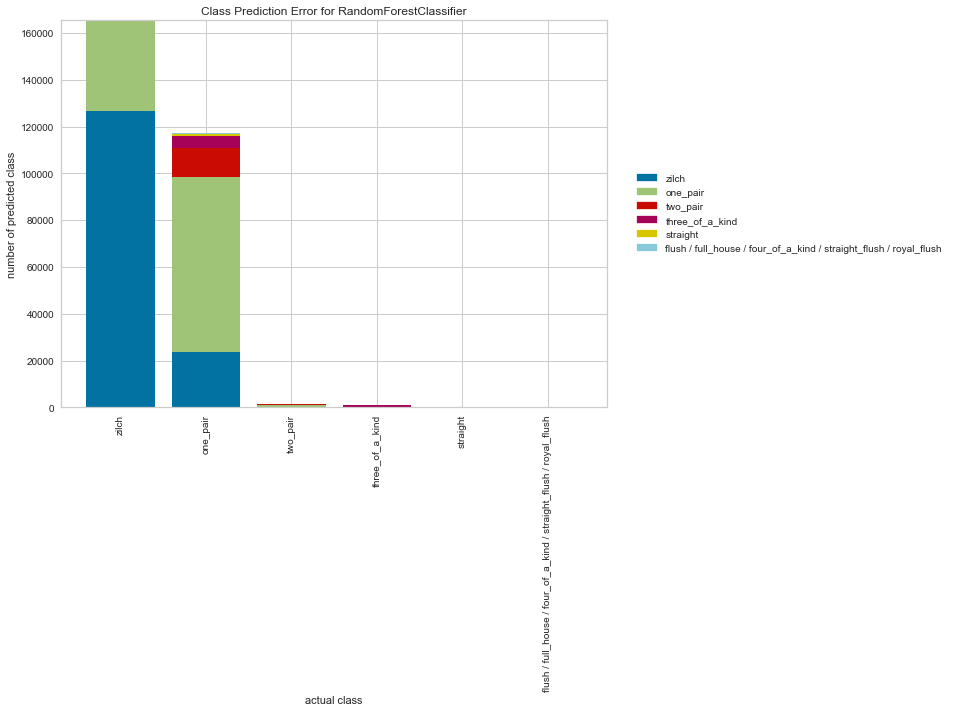

In [11]:
error = ClassPredictionError(clf, size = (1080, 720), classes = labels)
error.score(X_test, Y_test)
error.poof()